In [1]:
import os
import datetime

import pandas as pd
import numpy as np

In [2]:
os.chdir('..')

In [3]:
transactions_train = pd.read_csv('data/transactions_train.csv', dtype={'article_id': str})
print(transactions_train.shape)
transactions_train.head()

(31788324, 5)


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2


In [4]:
transactions_train['t_dat'] = pd.to_datetime(transactions_train['t_dat'])

In [5]:
articles_df = pd.read_csv('data/articles.csv', dtype={'article_id': str})
print(articles_df.shape)
articles_df.head()

(105542, 25)


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [6]:
submission = pd.read_csv('data/sample_submission.csv')
print(submission.shape)
submission.head()

(1371980, 2)


,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [7]:
end = transactions_train['t_dat'].max()
endm1 = end - datetime.timedelta(days=7)

endm1, end

(Timestamp('2020-09-15 00:00:00'), Timestamp('2020-09-22 00:00:00'))

In [8]:
transactions_train = transactions_train.merge(articles_df[['article_id', 'prod_name', 'product_type_name']], on='article_id')

In [9]:
transactions_train['last_week'] = np.where(
    transactions_train['t_dat'].between(endm1, end, inclusive='both'),
    1,
    0
)

In [10]:
transactions_train.sort_values(['customer_id', 't_dat'], ascending=True, inplace=True)

In [15]:
sample_customer_id = transactions_train[transactions_train['last_week'] == 1]['customer_id'].sample().item()
sample_customer_id

'72292d794d7f19e957a892d79c83e71a1e75d4fe5597cf73225dab0ebde0c854'

In [18]:
transactions_train[transactions_train['customer_id'] == sample_customer_id]

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_type_name,last_week
3981018,2018-10-21,72292d794d7f19e957a892d79c83e71a1e75d4fe5597cf...,0579865003,0.033881,2,Aruba denim jacket,Jacket,0
6929918,2018-10-21,72292d794d7f19e957a892d79c83e71a1e75d4fe5597cf...,0523776004,0.059305,2,NAOMI PADDED JACKET,Jacket,0
357126,2018-12-10,72292d794d7f19e957a892d79c83e71a1e75d4fe5597cf...,0662888003,0.033881,2,Miranda,Sweater,0
7887518,2018-12-10,72292d794d7f19e957a892d79c83e71a1e75d4fe5597cf...,0576050001,0.050831,2,April,Cardigan,0
2556278,2018-12-23,72292d794d7f19e957a892d79c83e71a1e75d4fe5597cf...,0636455003,0.050831,1,Jennifer (1),Blazer,0
...,...,...,...,...,...,...,...,...
25183732,2020-08-30,72292d794d7f19e957a892d79c83e71a1e75d4fe5597cf...,0851996001,0.067780,2,Kelly top,Sweater,0
31753063,2020-09-09,72292d794d7f19e957a892d79c83e71a1e75d4fe5597cf...,0897358001,0.101678,2,Remy padded jacket,Jacket,0
19254532,2020-09-20,72292d794d7f19e957a892d79c83e71a1e75d4fe5597cf...,0720810011,0.059305,2,Cobra Constructed,Trousers,1
21883153,2020-09-20,72292d794d7f19e957a892d79c83e71a1e75d4fe5597cf...,0690449022,0.067780,2,Skinny 5pkt Premiumprice,Trousers,1


In [37]:
sessions = transactions_train.groupby(['t_dat', 'customer_id'])[['article_id']].count().reset_index()

In [38]:
sessions['diff'] = sessions.groupby('customer_id')['t_dat'].diff()

In [39]:
sessions['customer_id'].nunique()

1362281

In [40]:
sessions['diff'].dropna().describe()

count                       7717898
mean     48 days 06:08:39.677456222
std      71 days 16:22:58.856560252
min                 1 days 00:00:00
25%                 7 days 00:00:00
50%                22 days 00:00:00
75%                58 days 00:00:00
max               731 days 00:00:00
Name: diff, dtype: object

<AxesSubplot:>

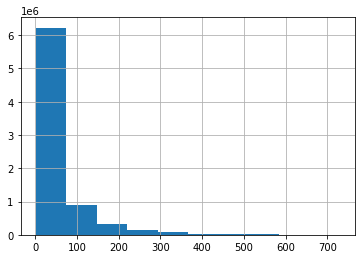

In [32]:
sessions['diff'].dropna().astype(str).str.replace(' days', '').astype(int).hist()

In [41]:
sessions.head()

,t_dat,customer_id,article_id,diff
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2,NaT
1,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,5,NaT
2,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,5,NaT
3,2018-09-20,0008968c0d451dbc5a9968da03196fe20051965edde741...,2,NaT
4,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,30,NaT


In [43]:
sessions.sort_values(['customer_id', 't_dat'], inplace=True)

In [45]:
# Items per session
sessions['article_id'].describe()

count    9.080179e+06
mean     3.500848e+00
std      3.619618e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      5.700000e+02
Name: article_id, dtype: float64

In [65]:
np.quantile(sessions['article_id'], 0.95)

10.0

In [62]:
# Sessions per customer
sessions.groupby('customer_id')['t_dat'].count().describe()

count    1.362281e+06
mean     6.665423e+00
std      9.707005e+00
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      8.000000e+00
max      4.270000e+02
Name: t_dat, dtype: float64

In [63]:
np.quantile(sessions.groupby('customer_id')['t_dat'].count(), 0.9)

17.0

In [72]:
sessions[sessions['customer_id'].isin(sessions[sessions['t_dat'] > endm1]['customer_id'].unique())]

,t_dat,customer_id,article_id,diff
154528,2018-09-30,00039306476aaf41a07fed942884f16b30abfa83a2a8be...,3,NaT
165403,2018-10-01,00039306476aaf41a07fed942884f16b30abfa83a2a8be...,15,1 days
1952297,2019-02-23,00039306476aaf41a07fed942884f16b30abfa83a2a8be...,4,145 days
5110290,2019-10-25,00039306476aaf41a07fed942884f16b30abfa83a2a8be...,2,244 days
5950673,2019-12-31,00039306476aaf41a07fed942884f16b30abfa83a2a8be...,5,67 days
...,...,...,...,...
8733135,2020-08-24,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,1,1 days
8801699,2020-08-29,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,4,5 days
8934949,2020-09-09,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,8,11 days
8974039,2020-09-12,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,2,3 days


In [6]:
len(set(transactions_train['article_id'])) / len(set(articles_df['article_id']))

0.9905724735176518

In [7]:
len(set(articles_df['article_id'])) - len(set(transactions_train['article_id']))

995

In [9]:
len(set(transactions_train['customer_id'])) / len(set(submission['customer_id']))

0.9929306549658158

In [10]:
len(set(submission['customer_id'])) - len(set(transactions_train['customer_id']))

9699

In [17]:
transaction_last_week = transactions_train[transactions_train['t_dat'] >= endm1]
print(transaction_last_week.shape)
transaction_last_week.head()

(266364, 5)


,t_dat,customer_id,article_id,price,sales_channel_id
31521960,2020-09-15,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0794321007,0.061000,2
31521961,2020-09-15,00040239317e877c77ac6e79df42eb2633ad38fcac09fc...,0875272011,0.050831,2
31521962,2020-09-15,00040239317e877c77ac6e79df42eb2633ad38fcac09fc...,0875272012,0.050831,2
31521963,2020-09-15,000749135ee9aa3a24c2316ea5ae4f495b39c1653c5612...,0800691007,0.011847,2
31521964,2020-09-15,000749135ee9aa3a24c2316ea5ae4f495b39c1653c5612...,0800691007,0.011847,2


In [20]:
transaction_last_week.groupby('customer_id')['article_id'].count().describe()

count    75481.000000
mean         3.528888
std          3.597439
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        104.000000
Name: article_id, dtype: float64

In [21]:
(
    transaction_last_week[['customer_id']]
    .drop_duplicates()
    .merge(
        transactions_train, 
        on='customer_id'
    )
    .groupby('customer_id')['article_id']
    .count()
    .describe()
)

count    75481.000000
mean        62.354791
std         77.404444
min          1.000000
25%         15.000000
50%         38.000000
75%         80.000000
max       1895.000000
Name: article_id, dtype: float64